# Analysis of users.json

#### Data loading

In [5]:
import json
import pandas as pd

# users.json is too large (3.3 gb)
data_size = 100000

with open("yelp_dataset/yelp_academic_dataset_user.json", 'r') as f:
    user_head = [next(f) for x in range(data_size)]
f.close()

user_data = []
for line in user_head:
    user_data.append(json.loads(line))

df = pd.DataFrame(user_data)
print("%i records loaded, each composed by %i columns." % (df.shape[0], df.shape[1]))

100000 records loaded, each composed by 22 columns.


#### Data preview

In [6]:
df.head()

,average_stars,compliment_cool,compliment_cute,compliment_funny,compliment_hot,compliment_list,compliment_more,compliment_note,compliment_photos,compliment_plain,...,cool,elite,fans,friends,funny,name,review_count,useful,user_id,yelping_since
0,3.57,22,0,22,3,1,2,11,0,15,...,227,,14,"oeMvJh94PiGQnx_6GlndPQ, wm1z1PaJKvHgSDRKfwhfDg...",225,Rafael,553,628,ntlvfPzc8eglqvk92iDIAw,2007-07-06 03:27:11
1,3.84,63,2,63,36,1,4,33,5,37,...,400,"2008,2009,2010,2011,2012,2013",27,"ly7EnE8leJmyqyePVYFlug, pRlR63iDytsnnniPb3AOug...",316,Michelle,564,790,FOBRPlBHa3WPHFB5qYDlVg,2008-04-28 01:29:25
2,3.44,17,1,17,9,0,6,3,1,7,...,103,2010,5,"Uwlk0txjQBPw_JhHsQnyeg, Ybxr1tSCkv3lYA0I1qmnPQ...",125,Martin,60,151,zZUnPeh2hEp0WydbAZEOOg,2008-08-28 23:40:05
3,3.08,7,0,7,2,0,1,7,0,14,...,84,2009,6,"iog3Nyg1i4jeumiTVG_BSA, M92xWY2Vr9w0xoH8bPplfQ...",160,John,206,233,QaELAmRcDc5TfJEylaaP8g,2008-09-20 00:08:14
4,4.37,31,1,31,8,1,9,22,31,28,...,512,"2009,2010,2011,2012,2014,2015,2016,2017,2018",78,"3W3ZMSthojCUirKEqAwGNw, eTIbuu23j9tOgmIa9POyLQ...",400,Anne,485,1265,xvu8G900tezTzbbfqmTKvA,2008-08-09 00:30:27


#### Correlation matrix

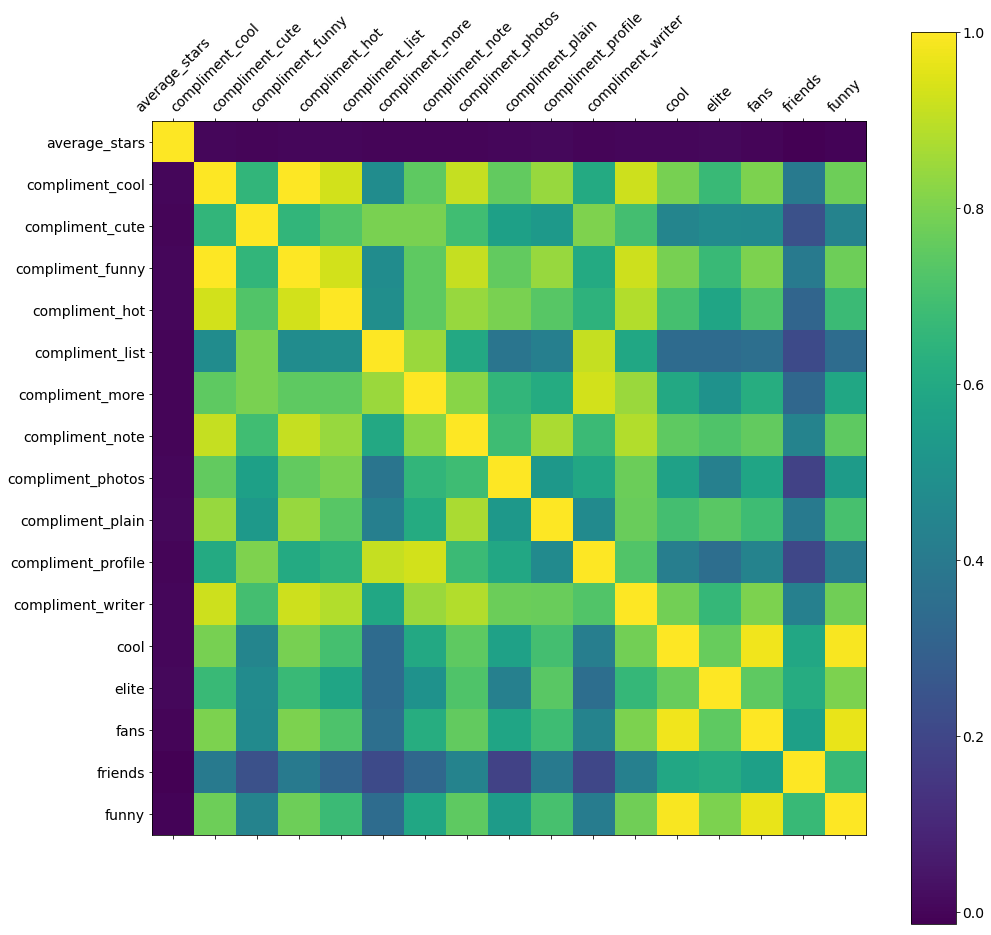

In [18]:
import matplotlib.pyplot as plt

f = plt.figure(figsize=(16, 16))
plt.matshow(df.corr(), fignum=f.number)
plt.xticks(range(df.shape[1]-5), df.columns, fontsize=14, rotation=45)
plt.yticks(range(df.shape[1]-5), df.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)

#### Scatter plot (review_count, average_stars)

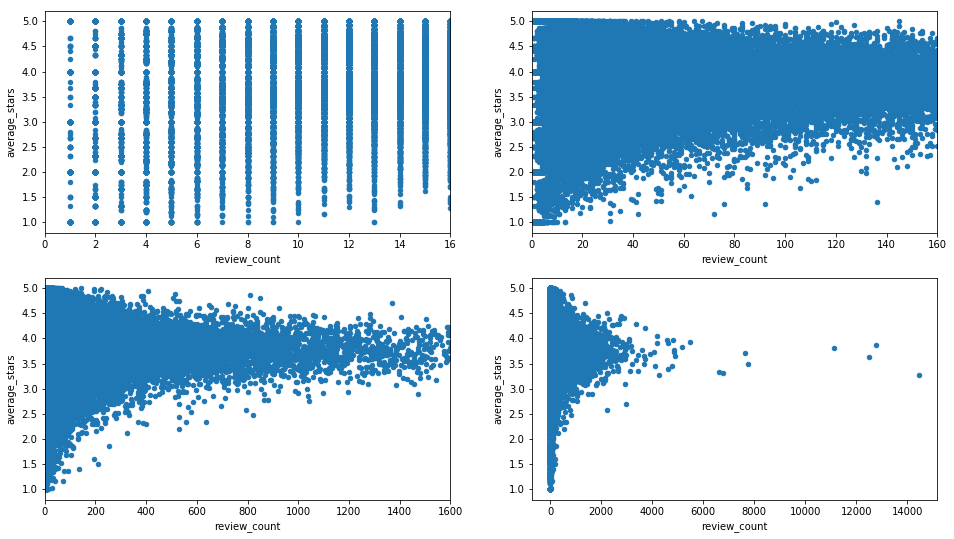

In [19]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16,9))

axes[0][0].set_xlim(0, 16)
df.plot.scatter(x='review_count', y='average_stars', ax=axes[0][0])
axes[0][1].set_xlim(0, 160)
df.plot.scatter(x='review_count', y='average_stars', ax=axes[0][1])
axes[1][0].set_xlim(0, 1600)
df.plot.scatter(x='review_count', y='average_stars', ax=axes[1][0])
df.plot.scatter(x='review_count', y='average_stars', ax=axes[1][1])

#### Scatter plot (review_count, useful)

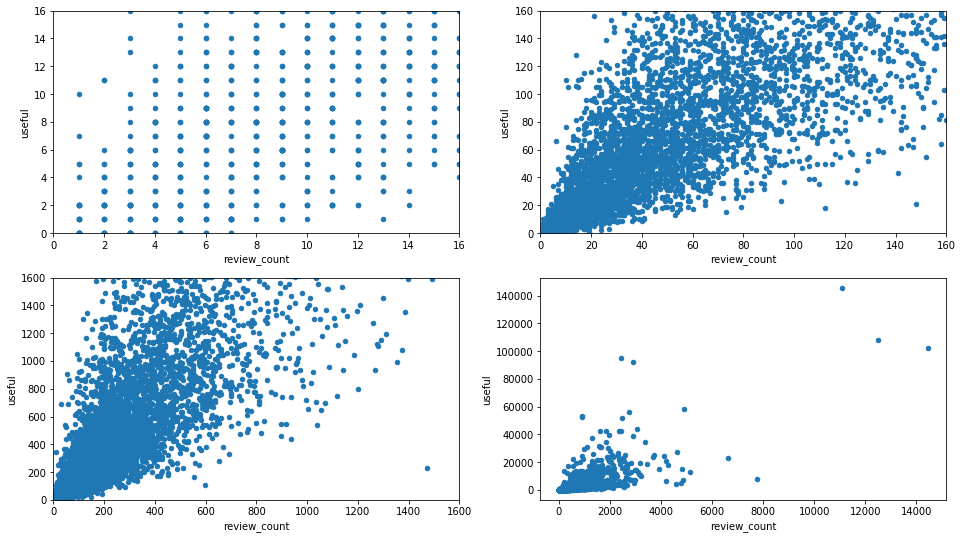

In [59]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16,9))

axes[0][0].set_xlim(0, 16)
axes[0][0].set_ylim(0, 16)
df.plot.scatter(x='review_count', y='useful', ax=axes[0][0])
axes[0][1].set_xlim(0, 160)
axes[0][1].set_ylim(0, 160)
df.plot.scatter(x='review_count', y='useful', ax=axes[0][1])
axes[1][0].set_xlim(0, 1600)
axes[1][0].set_ylim(0, 1600)
df.plot.scatter(x='review_count', y='useful', ax=axes[1][0])
df.plot.scatter(x='review_count', y='useful', ax=axes[1][1])

#### Scatter plot (review_count, fans)

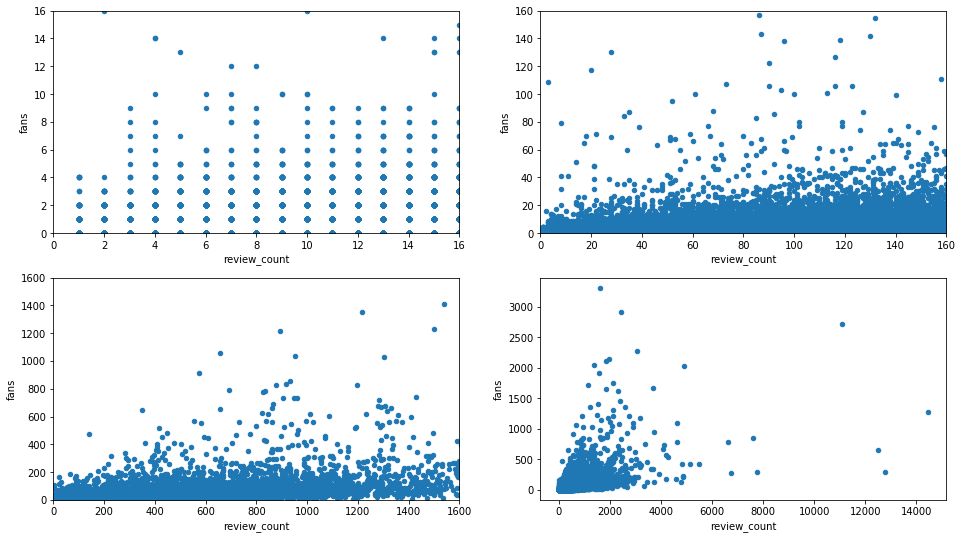

In [21]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16,9))

axes[0][0].set_xlim(0, 16)
axes[0][0].set_ylim(0, 16)
df.plot.scatter(x='review_count', y='fans', ax=axes[0][0])
axes[0][1].set_xlim(0, 160)
axes[0][1].set_ylim(0, 160)
df.plot.scatter(x='review_count', y='fans', ax=axes[0][1])
axes[1][0].set_xlim(0, 1600)
axes[1][0].set_ylim(0, 1600)
df.plot.scatter(x='review_count', y='fans', ax=axes[1][0])
df.plot.scatter(x='review_count', y='fans', ax=axes[1][1])

#### "Compliment" metrics distribution

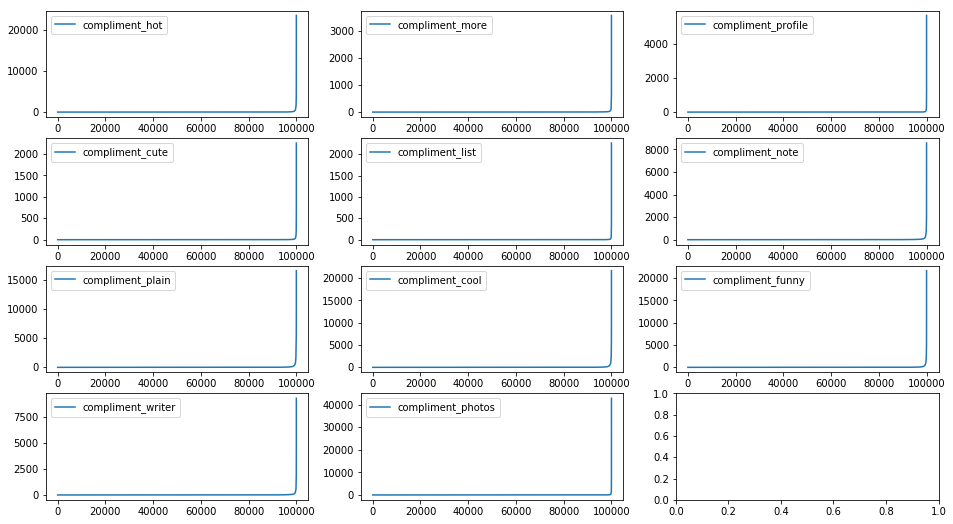

In [20]:
cols = ['compliment_hot', 'compliment_more', 'compliment_profile', 'compliment_cute', 'compliment_list', 
        'compliment_note', 'compliment_plain', 'compliment_cool', 'compliment_funny', 'compliment_writer', 
        'compliment_photos']

nc = 3
nr = int(len(cols)/nc)+1
fig, axes = plt.subplots(nrows=nr, ncols=nc, figsize=(16,9))

for i, col in enumerate(cols):
    comp = df[[col]].sort_values(by=[col])
    comp = comp.reset_index()[[col]]
    comp.plot.line(ax=axes[int(i/nc)][i-int(i/nc)*nc])